# Activity 1.3 : Regularization

#### Objective(s):

This activity aims to demonstrate how to apply  regularization in neural networks

#### Intended Learning Outcomes (ILOs):
* Demonstrate how to build and train neural networks with regularization
* Demonstrate how to visualize the model with regularization
* Evaluate the result of model with regularization


#### Resources:
* Jupyter Notebook
* MNIST 


#### Procedures
Load the necessary libraries

In [1]:
from __future__ import print_function

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Load the data, shuffled and split between train and test sets

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


Get the size of the sample train data

In [5]:
x_train[0].shape

(28, 28)

Check the sample train data

In [6]:
x_train[333] 

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  87, 138,
        170, 253, 201, 244, 212, 222, 138,  86,  22,   0,   0,   0,   0,
          0,   0],
       [  

Check the corresponding label in the training set

In [7]:

y_train[333]

np.uint8(8)

Check the actual image

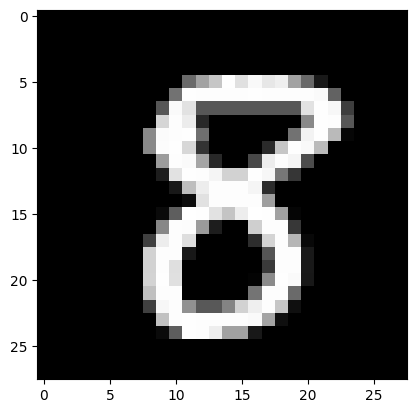

In [8]:

plt.imshow(x_train[333], cmap='Greys_r')

Check the shape of the x_train and x_test

In [9]:

print(x_train.shape, 'train samples')
print(x_test.shape, 'test samples')

(60000, 28, 28) train samples
(10000, 28, 28) test samples


* Convert the x_train and x_test
* Cast the numbers to floats
* Normalize the inputs

In [10]:

x_train = x_train.reshape(len(x_train), 28*28)
x_test = x_test.reshape(len(x_test), 28*28)


x_train = x_train.astype('float32')
x_test = x_test.astype('float32')


x_train /= 255
x_test /= 255


Convert class vectors to binary class matrices

In [11]:

num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

y_train[333]  # now the digit k is represented by a 1 in the kth entry (0-indexed) of the length 10 vector

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.])

* Build the model with two hidden layers of size 512. 
* Use dropout of 0.2 
* Check the model summary

In [12]:

model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

c:\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 55,050 (215.04 KB)

 Trainable params: 55,050 (215.04 KB)

 Non-trainable params: 0 (0.00 B)

Compile the model using learning rate of 0.001 and optimizer of RMSprop

In [16]:
learning_rate = .001
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(learning_rate),
              metrics=['accuracy'])
batch_size = 128  # mini-batch with 128 examples
epochs = 30
history = model.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(x_test, y_test))

Epoch 1/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7483 - loss: 0.8178 - val_accuracy: 0.9385 - val_loss: 0.1993
Epoch 2/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9209 - loss: 0.2666 - val_accuracy: 0.9538 - val_loss: 0.1539
Epoch 3/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9367 - loss: 0.2124 - val_accuracy: 0.9605 - val_loss: 0.1359
Epoch 4/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9484 - loss: 0.1723 - val_accuracy: 0.9657 - val_loss: 0.1152
Epoch 5/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9539 - loss: 0.1516 - val_accuracy: 0.9703 - val_loss: 0.1018
Epoch 6/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9583 - loss: 0.1371 - val_accuracy: 0.9710 - val_loss: 0.0976
Epoch 7/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9599 - loss: 0.1312 - val_accuracy: 0.9732 - val_loss: 0.0911
Epoch 8/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9630 - loss: 0.1240 - val_accuracy: 0.

Use Keras evaluate function to evaluate performance on the test set

In [17]:

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.08950265496969223
Test accuracy: 0.9772999882698059


Interpret the result

The test loss indicates that the model is performing great because a lower test loss indicates better performance of the model, 0.08 is really great for the test loss suggesting that this model is doing a great job. The test accuracy is also high which means the model accurately classified the 97% of the test set, this means that this model predictive performance is really strong.

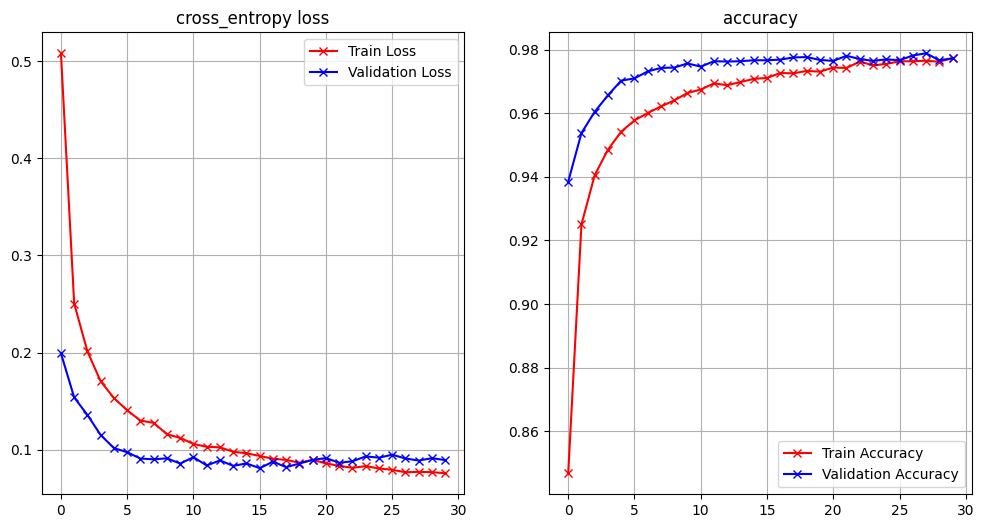

In [19]:
def plot_loss_accuracy(history):
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(history.history["loss"],'r-x', label="Train Loss")
    ax.plot(history.history["val_loss"],'b-x', label="Validation Loss")
    ax.legend()
    ax.set_title('cross_entropy loss')
    ax.grid(True)


    ax = fig.add_subplot(1, 2, 2)
    ax.plot(history.history["accuracy"],'r-x', label="Train Accuracy")
    ax.plot(history.history["val_accuracy"],'b-x', label="Validation Accuracy")
    ax.legend()
    ax.set_title('accuracy')
    ax.grid(True)
    

plot_loss_accuracy(history)

Interpret the result

Having the loss greatly goes down means that the model is doing a great job predicting the target variable because the train loss and validation loss can be seen going down though the validation loss can be seen going up a little bit in the intances of 30 going above the train loss though it is doing a great job since it is still low for the loss. The accuracy we can see it jump from 0 to 92 fast which means that this model correctly classified the 97% of the set and having it performing really well, having a strong predictive performance additionally the model performed well on this data, having it receive a low loss and high accuracy.

#### Supplementary Activity

* Use the Keras "Sequential" functionality to build a new model (model_1) with the following specifications:

1. Two hidden layers.
2. First hidden layer of size 400 and second of size 300
3. Dropout of .4 at each layer
4. How many parameters does your model have?  How does it compare with the previous model?
5. Train this model for 20 epochs with RMSProp at a learning rate of .001 and a batch size of 128
6. Use at least two  regularization techniques and apply it to the new model (model_2)
7. Train this model for your preferred epochs , learning rate, batch size and optimizer
8. Compare the accuracy and loss (training and validation) of model_1 and model_2

In [20]:
from keras.regularizers import l2

model_1 = Sequential()
model_1.add(Dense(400, activation='relu', input_shape=(784,)))
model_1.add(Dropout(0.4))
model_1.add(Dense(300, activation='relu'))
model_1.add(Dropout(0.4))
model_1.add(Dense(10, activation='softmax'))
model_1.summary()



Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 400)            │       314,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 300)            │       120,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 300)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         3,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 437,310 (1.67 MB)

 Trainable params: 437,310 (1.67 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:
model_1.compile(loss='categorical_crossentropy',
                optimizer=RMSprop(learning_rate),
                metrics=['accuracy'])


In [22]:
history_1 = model_1.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=20,
    verbose=1,
    validation_data=(x_test, y_test))

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - accuracy: 0.8265 - loss: 0.5590 - val_accuracy: 0.9617 - val_loss: 0.1240
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.9528 - loss: 0.1570 - val_accuracy: 0.9713 - val_loss: 0.0944
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.9622 - loss: 0.1214 - val_accuracy: 0.9772 - val_loss: 0.0797
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.9702 - loss: 0.1014 - val_accuracy: 0.9782 - val_loss: 0.0795
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.9744 - loss: 0.0879 - val_accuracy: 0.9786 - val_loss: 0.0759
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9767 - loss: 0.0799 - val_accuracy: 0.9800 - val_loss: 0.0738
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.9782 - loss: 0.0706 - val_accuracy: 0.9803 - val_loss: 0.0720
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.9806 - loss: 0.0659 - val_accu

In [23]:

model_2 = Sequential()
model_2.add(Dense(400, activation='relu', input_shape=(784,), kernel_regularizer=l2(0.01)))
model_2.add(Dropout(0.4))
model_2.add(Dense(300, activation='relu', kernel_regularizer=l2(0.01)))
model_2.add(Dropout(0.4))
model_2.add(Dense(10, activation='softmax'))
model_2.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 400)            │       314,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 300)            │       120,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 300)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │         3,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 437,310 (1.67 MB)

 Trainable params: 437,310 (1.67 MB)

 Non-trainable params: 0 (0.00 B)

In [24]:

model_2.compile(loss='categorical_crossentropy',
                optimizer=RMSprop(learning_rate),
                metrics=['accuracy'])


In [25]:

history_2 = model_2.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=30,
    verbose=1,
    validation_data=(x_test, y_test))

Epoch 1/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - accuracy: 0.7951 - loss: 3.0464 - val_accuracy: 0.9229 - val_loss: 0.5734
Epoch 2/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.8994 - loss: 0.6284 - val_accuracy: 0.8715 - val_loss: 0.6632
Epoch 3/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.9087 - loss: 0.5580 - val_accuracy: 0.9360 - val_loss: 0.4522
Epoch 4/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.9142 - loss: 0.5231 - val_accuracy: 0.9356 - val_loss: 0.4441
Epoch 5/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.9155 - loss: 0.5036 - val_accuracy: 0.9395 - val_loss: 0.4209
Epoch 6/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9190 - loss: 0.4838 - val_accuracy: 0.9365 - val_loss: 0.4344
Epoch 7/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9242 - loss: 0.4693 - val_accuracy: 0.9509 - val_loss: 0.3763
Epoch 8/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.9250 - loss: 0.4570 - val_accu

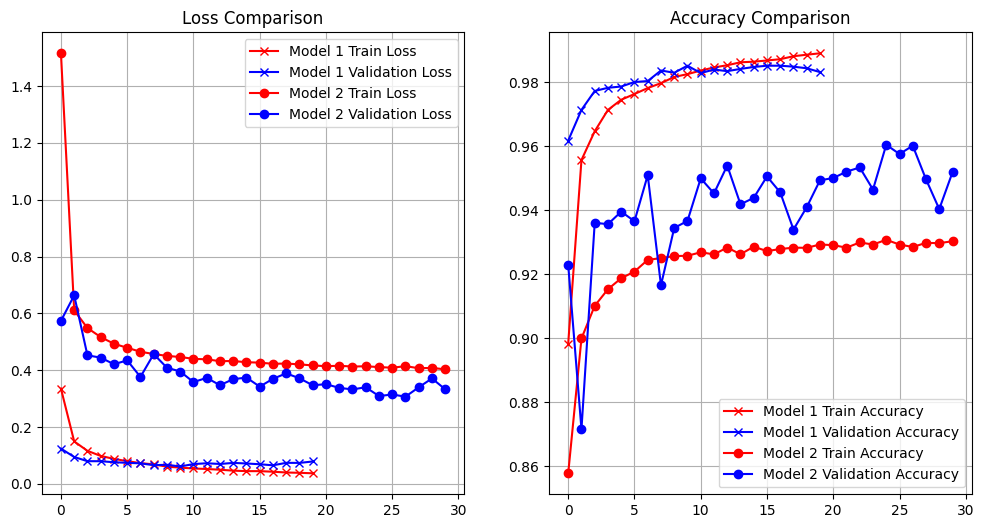

In [26]:
def plot_comparison(history_1, history_2):
    fig = plt.figure(figsize=(12, 6))
    
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(history_1.history["loss"], 'r-x', label="Model 1 Train Loss")
    ax.plot(history_1.history["val_loss"], 'b-x', label="Model 1 Validation Loss")
    ax.plot(history_2.history["loss"], 'r-o', label="Model 2 Train Loss")
    ax.plot(history_2.history["val_loss"], 'b-o', label="Model 2 Validation Loss")
    ax.legend()
    ax.set_title('Loss Comparison')
    ax.grid(True)

    ax = fig.add_subplot(1, 2, 2)
    ax.plot(history_1.history["accuracy"], 'r-x', label="Model 1 Train Accuracy")
    ax.plot(history_1.history["val_accuracy"], 'b-x', label="Model 1 Validation Accuracy")
    ax.plot(history_2.history["accuracy"], 'r-o', label="Model 2 Train Accuracy")
    ax.plot(history_2.history["val_accuracy"], 'b-o', label="Model 2 Validation Accuracy")
    ax.legend()
    ax.set_title('Accuracy Comparison')
    ax.grid(True)

plot_comparison(history_1, history_2)

#### Conclusion

the model train loss